#### Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')

#### Loading the dataset to a pandas dataframe

In [5]:
df = pd.read_csv(r"C:\Users\ayanm\Desktop\Data for ML\Synthetic Financial Data.csv")

In [6]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


#### Dataset Information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
df.shape

(6362620, 11)

In [10]:
df.groupby('isFlaggedFraud').count()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
isFlaggedFraud,,,,,,,,,,
0,6362604,6362604,6362604,6362604,6362604,6362604,6362604,6362604,6362604,6362604
1,16,16,16,16,16,16,16,16,16,16


In [11]:
df.pivot_table(values = 'amount',index = 'type',columns = 'isFraud',aggfunc = 'count')

isFraud,0,1
type,,
CASH_IN,1399284.0,NaN
CASH_OUT,2233384.0,4116.0
DEBIT,41432.0,NaN
PAYMENT,2151495.0,NaN
TRANSFER,528812.0,4097.0


In [12]:
df_filtered = df[df.type.isin(['CASH_OUT','TRANSFER'])]

#### LabelEncoding the type column

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
encoder = LabelEncoder()

In [16]:
df_filtered['typeEncoded'] = encoder.fit_transform(df_filtered['type'])
df_filtered.pivot_table(values = 'amount',index = 'typeEncoded',columns = 'isFraud',aggfunc = 'count')

isFraud,0,1
typeEncoded,,
0,2233384,4116
1,528812,4097


In [17]:
df_filtered.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,typeEncoded
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,1
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,1


#### Dropping unnecessary columns

In [19]:
df2 = df_filtered.drop(['step','type','nameOrig','nameDest','isFlaggedFraud'],axis = 1)

In [20]:
df2.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,typeEncoded
2,181.00,181.0,0.0,0.0,0.00,1,1
3,181.00,181.0,0.0,21182.0,0.00,1,0
15,229133.94,15325.0,0.0,5083.0,51513.44,0,0
19,215310.30,705.0,0.0,22425.0,0.00,0,1
24,311685.89,10835.0,0.0,6267.0,2719172.89,0,1


#### Distribution of legit and fraudulent transaction

In [22]:
legit = df2[df2.isFraud == 0]
legit.shape

(2762196, 7)

In [23]:
fraud = df2[df2.isFraud == 1]
fraud.shape

(8213, 7)

#### Under-Sampling : Build a sample dataset containing similar distribution of Legit and Fraudulent transactions

In [25]:
legit_sample = legit.sample (n = 8213)

In [26]:
legit_sample.shape

(8213, 7)

In [27]:
legit.amount.describe()

count    2.762196e+06
mean     3.141155e+05
std      8.771441e+05
min      1.000000e-02
25%      8.290823e+04
50%      1.710345e+05
75%      3.059942e+05
max      9.244552e+07
Name: amount, dtype: float64

In [28]:
fraud.amount.describe()

count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64

#### Concatinating two dataframe

In [30]:
new_df = pd.concat ([legit_sample, fraud], axis = 0)

In [31]:
new_df.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,typeEncoded
4138498,171811.87,0.0,0.00,202211.41,374023.28,0,0
3838865,18886.13,275215.0,256328.87,0.00,18886.13,0,0
4544730,2180439.07,35750.0,0.00,3428748.25,5609187.33,0,1
5810201,304708.60,0.0,0.00,699749.97,1004458.56,0,1
1770154,169366.25,0.0,0.00,697470.73,866836.98,0,0


In [32]:
new_df.isFraud.value_counts()

isFraud
0    8213
1    8213
Name: count, dtype: int64

#### Splitting the data into features and targets

In [34]:
X = new_df.drop(['isFraud'], axis = 1)
y = new_df.isFraud

#### Spilting the data into training and testing

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = False)

#### Model training
##### Logistic Regression : Binary Classification

In [38]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

#### Model Evaluation

In [40]:
lr.score(X_test, y_test)

0.9001825928180158

In [41]:
y_pred = lr.predict(X_test)

In [42]:
cm = confusion_matrix (y_test, y_pred)
cm

array([[1524,  106],
       [ 222, 1434]], dtype=int64)

Text(50.722222222222214, 0.5, 'actual')

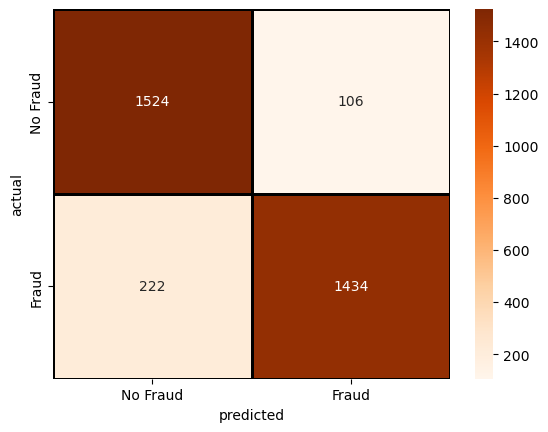

In [43]:
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Oranges', linewidths = 1, linecolor = 'Black')
plt.xticks(np.arange(2)+.5,['No Fraud','Fraud'])
plt.yticks(np.arange(2)+.5,['No Fraud','Fraud'])
plt.xlabel('predicted')
plt.ylabel('actual')

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      1630
           1       0.93      0.87      0.90      1656

    accuracy                           0.90      3286
   macro avg       0.90      0.90      0.90      3286
weighted avg       0.90      0.90      0.90      3286



#### Model with DecisionTreeClassifier

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [48]:
d_predicted = dt.predict(X_test)

In [49]:
dt.score(X_test, y_test)

0.987522824102252

In [50]:
cm = confusion_matrix (y_test, d_predicted)
cm

array([[1602,   28],
       [  13, 1643]], dtype=int64)

Text(50.722222222222214, 0.5, 'actual')

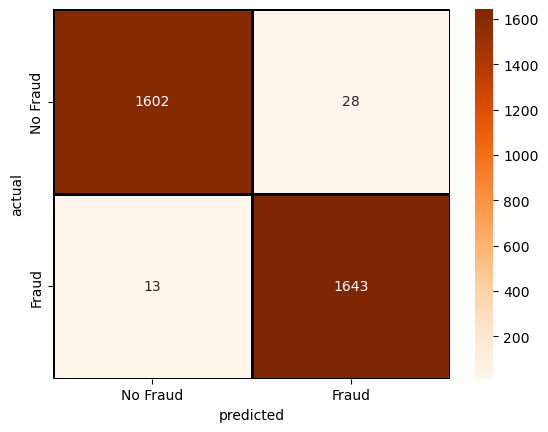

In [51]:
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Oranges', linewidths = 1, linecolor = 'Black')
plt.xticks(np.arange(2)+.5,['No Fraud','Fraud'])
plt.yticks(np.arange(2)+.5,['No Fraud','Fraud'])
plt.xlabel('predicted')
plt.ylabel('actual')

In [52]:
print(classification_report(y_test, d_predicted))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1630
           1       0.98      0.99      0.99      1656

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286



### Conclusion : Decision Tree Classifier performs better than the Logistic Regression, probably by better understanding the complex relationships in the feature data. 